<a href="https://colab.research.google.com/github/gloriabee/TwitterSentimentAnalysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and analyze dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('tweet_data.csv')

In [ ]:
df.shape

(18727, 3)

In [ ]:
df.sample(5)

,textID,tweet_text,sentiment
14591,1751953368,@ashleytisdale http://twitpic.com/4t4jv - No j...,positive
10336,1694329574,I am now eating one of those big subway cookie...,positive
17254,1753399537,@augustine25 TY my friend. Yes ur right.... a ...,positive
10093,1694220719,"@NateALO Hope you had a great weekend, congrat...",positive
4955,1962908347,running errands with geeta... feeling like i h...,negative




*   print a tweet and its sentiment based on a tweet ID


In [ ]:
tweet_id=4879
tweet=df.iloc[tweet_id]
# print(f"Tweet: {tweet["tweet_text"]}")
print(f"Tweet: {tweet['tweet_text']}")
print(f"Tweet sentiment: {tweet['sentiment']}")

Tweet: Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment: negative


## Dataset Visualization

### Matplotlib


*   import the pyplot module from the matplotlib package



In [ ]:
import matplotlib.pyplot as plt


* `pyplot` helps understanding and representing how tweets are distributed over the dataset

In [ ]:
sentiment_count= df['sentiment'].value_counts()
sentiment_count

,count
sentiment,
positive,9897
negative,8830


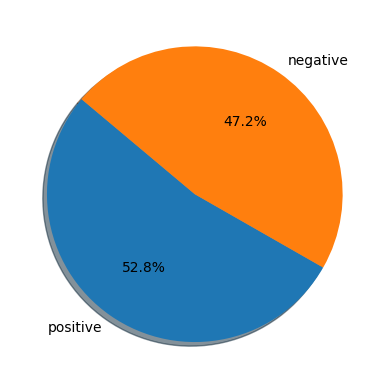

In [ ]:
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%',shadow=True,startangle=140)
plt.show()

### Wordclouds



*   The **Wordclouds** package is very useful to get a quick overview of most recurrent words in the text corpus


In [ ]:
from wordcloud import WordCloud



*   What are the words most often present in positive tweets?



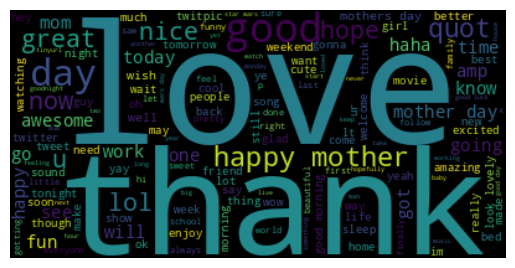

In [ ]:
pos_tweets=df[df['sentiment']=='positive']
txt= " ".join(tweet.lower() for tweet in pos_tweets['tweet_text'])
wordcloud=WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



* ... and in negative tweets?



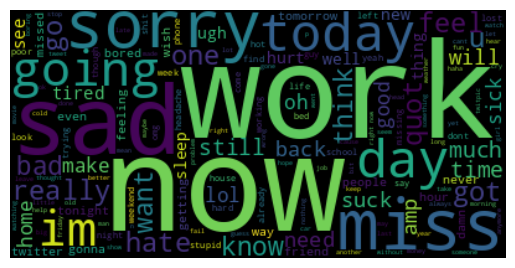

In [ ]:
pos_tweets=df[df['sentiment']=='negative']
txt= " ".join(tweet.lower() for tweet in pos_tweets['tweet_text'])
wordcloud=WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text Normalization



*   Import regex package



In [ ]:
import re

### Twitter features



*   Example of a random tweet that can be found on Twitter



In [ ]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

In [ ]:
tweet

'RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun'

#### RT Tag

* `R` : match "R" character
* `T` : match "T" character
* `\s` : match any whitespace character
* `+` : match one or more of the preceding tokens

Handle the RT Tag
* Replace occurences of RT with a default value



In [ ]:
def replace_retweet(tweet,default_replace=''):
  tweet=re.sub('RT\s+',default_replace,tweet)
  return tweet

In [ ]:
print(f"Processed tweet: {replace_retweet(tweet)}")

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


#### @User Tag



*   Replace @_Someone_ with a default user tag


In [ ]:
def replace_user(tweet,default_replace=''):
  tweet=re.sub('\B@\w+',default_replace,tweet)
  return tweet

In [ ]:
print(f"Processed tweet :{replace_user(tweet)}")

Processed tweet :RT  I love this! 👍 https://AIOutsider.com #NLP #Fun


#### Emojis



*   Install the emoji package



In [ ]:
pip install emoji --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.0 MB/s eta 0:00:00




*   import the installled package



In [ ]:
import emoji

* Replace emojis with a meaningful text

In [ ]:
def demojize(tweet):
  tweet=emoji.demojize(tweet)
  return tweet

In [ ]:
print(f"Processed tweet: {demojize(tweet)}")

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


#### URLs

Handle the url
* Replace occurences of **http://** or **https//** with a default value

In [ ]:
def replace_url(tweet,default_replace=''):
  tweet=re.sub('(http|https):\/\/\S+',default_replace,tweet)
  return tweet

In [ ]:
print(f"Processed tweet: {replace_url(tweet)}")

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


#### Hashtags



*   Replace occurences of #_something with a default value




In [ ]:
def replace_hashtag(tweet,default_replace=''):
  tweet=re.sub('#+',default_replace,tweet)
  return tweet

In [ ]:
print(f"Processed tweet: {replace_hashtag(tweet)}")

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


### General Features

Let's now have a look at some other features that are not really Twitter-dependent

In [ ]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

#### Remove upper capitalization



*   Lower case each letter in a specific tweet



In [ ]:
def to_lowercase(tweet):
  return tweet.lower()

In [ ]:
print(f"Processed tweet: {to_lowercase(tweet)}")

Processed tweet: looooooook at this ... i'd like it so much!


#### Word Repetition

* Replace word repetition with a single occurence ("ooooo" becomes "oo")

In [ ]:
def word_repetition(tweet):
  tweet=re.sub(r'(.)\1+',r'\1\1',tweet)
  return tweet

In [ ]:
print(f"Processed tweet: {word_repetition(tweet)}")

Processed tweet: LOOK at this .. I'd like it so much!


#### Punctuation Repetition

* replace punctuation repetition with a single occurence("!!!!!" becomes "!")

In [ ]:
def punct_repetition(tweet,default_replace=''):
  tweet=re.sub(r'[\?\.\!]+(?=[\?\.\!])',default_replace,tweet)
  return tweet


In [ ]:
print(f"Processed tweet: {punct_repetition(tweet)}")

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


#### Word Contraction

* install the contractions package

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.5 MB/s eta 0:00:00


* import the installed package

In [ ]:
import contractions

* Use contractions_dict to list most common contractions

In [ ]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a fix_contractions function used to replace contractions with their extended forms by using the contractions dictionary.

In [ ]:
def _fix_contractions(tweet):
  for k,v in contractions.contractions_dict.items():
    tweet=tweet.replace(k,v)
  return tweet

In [ ]:
print(f"Processed tweet: {_fix_contractions(tweet)}")
#

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


* Create a fix_contractions function used to replace contractions with their extended forms by using the contractions package.

In [ ]:
def _fix_contractions(tweet):
  tweet= contractions.fix(tweet)
  return tweet


In [ ]:
print(f"Processed tweet: {_fix_contractions(tweet)}")
#

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


### Tokenizations




*   Tokenization is a way to separate text into smaller chunks


**Tokenization Exceptions**

*   Punctuation
*   Stopwords
*   Numbers





#### Easy Tokenization

*   Install the NLTK package


In [ ]:
pip install nltk



*   import NLTK
*   import the word_tokenize module from NLTK
*   download the Punkt tokenizer model from NLTK




In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

* Simple tweet to be tokenized

In [ ]:
tweet= "These are 5 different words!"

* Create tokenize() function that takes a tweet as input and returns a list of  tokens

In [ ]:
word_tokenize(tweet)

['These', 'are', '5', 'different', 'words', '!']

#### Custom Tokenization

* import the string package



In [ ]:
import string

* retrieve english punctuation signs by using the string package

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~




*   import stopwords module from NLTK
*   download stopwords from NLTK



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

* create a set of english stopwords

In [ ]:
stop_words=set(stopwords.words('english'))
print(stop_words)

{'above', 'their', 'when', 'o', 'other', 'ain', 'below', 'am', 'out', 'she', 'an', 'shan', "he's", 'wasn', 'ours', 'these', 'needn', 'but', "it'd", 'which', 'no', 'myself', 'further', 'very', "i'm", 'll', 'both', 'does', "she's", 'isn', 'ma', 'some', 'haven', "she'll", 'theirs', 'hasn', 'i', 'can', "shan't", 'up', 'wouldn', 'during', "couldn't", 'my', 'too', 'is', 'who', 'just', 'doing', 'shouldn', 'into', "mustn't", 'in', "you've", 'mustn', "it's", 'with', 't', "she'd", 'are', 'don', "should've", "we're", 'not', 'yourself', "needn't", 'did', 'each', 'why', 'were', 'me', 'then', 'down', 'once', "you're", 'was', 'where', "he'll", 'its', 'few', 'themselves', "i've", 'him', 'it', 'against', 's', 'will', "you'd", 'or', 've', 'they', 'there', 'any', 'between', 'all', 'by', 'd', 'couldn', 'have', 'how', 'didn', 'than', 'about', 'should', "they're", "wouldn't", "we'd", 'because', 'from', 'we', 'them', 'our', "doesn't", "wasn't", "that'll", 'y', 'at', 'having', "isn't", 'won', 'you', 'he', 'mi

* remove stopwords from the set

In [ ]:
#stop_words.discard('not')

* create a custom_tokenize function

In [ ]:
def custom_tokenize(tweet,keep_punct=False,keep_alnum=False,keep_stop=False):
  token_list=word_tokenize(tweet)
  if not keep_punct:
    token_list=[token for token in token_list if token not in string.punctuation]

  if not keep_alnum:
    token_list=[token for token in token_list if token.isalpha()]

  if not keep_stop:
    token_list= [token for token in token_list if not token in stop_words]

  return token_list


* Test the function with a particular tweet

In [ ]:
print(f'Tweet tokens: {custom_tokenize(tweet,keep_punct=True,keep_alnum=True,keep_stop=True)}')
print(f'Tweet tokens: {custom_tokenize(tweet,keep_stop=True)}')
print(f'Tweet tokens: {custom_tokenize(tweet,keep_alnum=True)}')
#

Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['These', 'are', 'different', 'words']
Tweet tokens: ['These', '5', 'different', 'words']


### Stemmming

Stemming is the process of reducing words to their root form.
* Rule-based approach
* Faster but chops words
* Meaning is less important

Over-stemming -> univers*al*, univers*ity*,
univers*e*


Under-stemming -> alumnu*e*, alumni, alumna*e*



*   import different libraries and modules used for stemming



In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer



*   Lists of tokens to stem (remember that we stem tokens and not entire sentences)


In [ ]:
tokens= ["manager","management","managing"]



*   Stemmers can be defined by directly using NLTK.



In [ ]:
ps=PorterStemmer()
ls=LancasterStemmer()
ss=SnowballStemmer('english')

* Create a stem_tokens function that takes the list of tokens as input and returns a list of stemmed tokens

In [ ]:
def stem_tokens(tokens,stemmer):
  token_list=[]
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* print the different results and compare the stemmed tokens

In [ ]:
print(f"Porter stems: {stem_tokens(tokens,ps)}")
print(f"Lancaster stems: {stem_tokens(tokens,ls)}")
print(f"Snowball stems: {stem_tokens(tokens,ss)}")

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [ ]:
tokens=['international','companies','had','interns']
print(f"Porter stems: {stem_tokens(tokens,ps)}")
print(f"Lancaster stems: {stem_tokens(tokens,ls)}")
print(f"Snowball stems: {stem_tokens(tokens,ss)}")

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


### What is Lemmatization?

**Lemmatization** serves the same purpose as Stemming but makes use of word context.

* import different libraries and modules used for lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

* Lists of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [ ]:
tokens= ["international","companies","had","interns"]



* Part of Speech (POS) tagging



In [ ]:
word_Type={"international":wordnet.ADJ,
           "companies":wordnet.NOUN,
           "had":wordnet.VERB,
           "interns":wordnet.NOUN}

* Create the lemmatizer by using the WordNet module

In [ ]:
lemmatizer= WordNetLemmatizer()

* Create a lemmatize_tokens function that takes the lists of tokens as input and returns a list of lemmatized tokens

In [ ]:
def lemmatize_tokens(tokens,word_Type,lemmatizer):
  token_list=[]
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token,word_Type[token]))
  return token_list

In [ ]:
print(f"Tweet lemma: {lemmatize_tokens(tokens,word_Type,lemmatizer)}")

Tweet lemma: ['international', 'company', 'have', 'intern']


### Tweet Pre-processing


#### Putting it all together

* Long and complex tweet to be processed

In [ ]:
complex_tweet = r"""RT @AIOutsider : he looooook,
THis is a big and complex TWeet!!! 👍 ...
We'd be glad if you couldn't normalize it!
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

In [ ]:
def process_tweet(tweet,verbose=False):
  if verbose: print(f"initial tweet: {tweet}")

  ## Twitter Features
  tweet=replace_retweet(tweet)
  tweet=replace_user(tweet)
  tweet=replace_url(tweet)
  tweet=replace_hashtag(tweet)
  if verbose: print(f"Post twitter processing tweet: {tweet}")

  ## Word Features
  tweet=to_lowercase(tweet)
  tweet=_fix_contractions(tweet)
  tweet=word_repetition(tweet)
  tweet=punct_repetition(tweet)
  tweet=demojize(tweet)

  if verbose: print(f"Post Word processing tweet: {tweet}")

  ## Tokenization & Stemming
  tokens=custom_tokenize(tweet,keep_alnum=False,keep_stop=False)
  stemmer= SnowballStemmer("english")
  stem=stem_tokens(tokens,stemmer)
  return stem

In [ ]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'normal', 'check', 'let', 'know', 'nlp', 'fun']
